# Music Database
## CS 5012 Mini Project
### Lauren Neal (ln9bv)
### Loren Bushkar (lbb3y)
### David Fuentes (dmf4ns)
---------------------------------------------------

**Objective**: Build an operational database containing data from some of our favorite -- and potentially some not so favorite -- musical artists. 

We set out to create our own database of music, including artists, bands and the albums they create. We decided to start from scratch and populate our own data with the intention that our database will continue to grow over time as our music preferences grow and change!

We created three entities containing atrributes - artists, bands, and studio_albums where artists play in bands and bands record albums. Each entity will be identified by the primary key of name (artist_name, band_name and album_name) and these keys are used to link the resulting relationship sets. We decided to use names as the primary keys rather than an alphanumeric key since names are more descriptive and still guarantee uniqueness in the case of our music DB. We also saved space in each table by not including an extra key attribute.  

Many artists can play in many bands, although only one band can record an album (but they can record many albums). Every album is recorded by a band or it wouldn't exist.

The schema for our resulting database is below, including the attributes of the entities and the relationships:

### MUSIC DATABASE SCHEMA
#### STRONG ENTITY SETS:
**artists**(<u>artist_name</u>, birth_year, died_in) <br>
**studio_albums**(<u>album_name</u>, year, num_tracks) <br>
**bands**(<u>band_name</u>, founded, founded_city, founded_country, iso_code, genre, num_members) <br>

#### RELATIONSHIP SETS:
**plays_in** (<u>band_name</u>, <u>artist_name</u>, primary_instrument)<br>
**record** (<u>band_name</u>, <u>album_name</u>, label_name)

### ENTITY RELATIONSHIP DIAGRAM


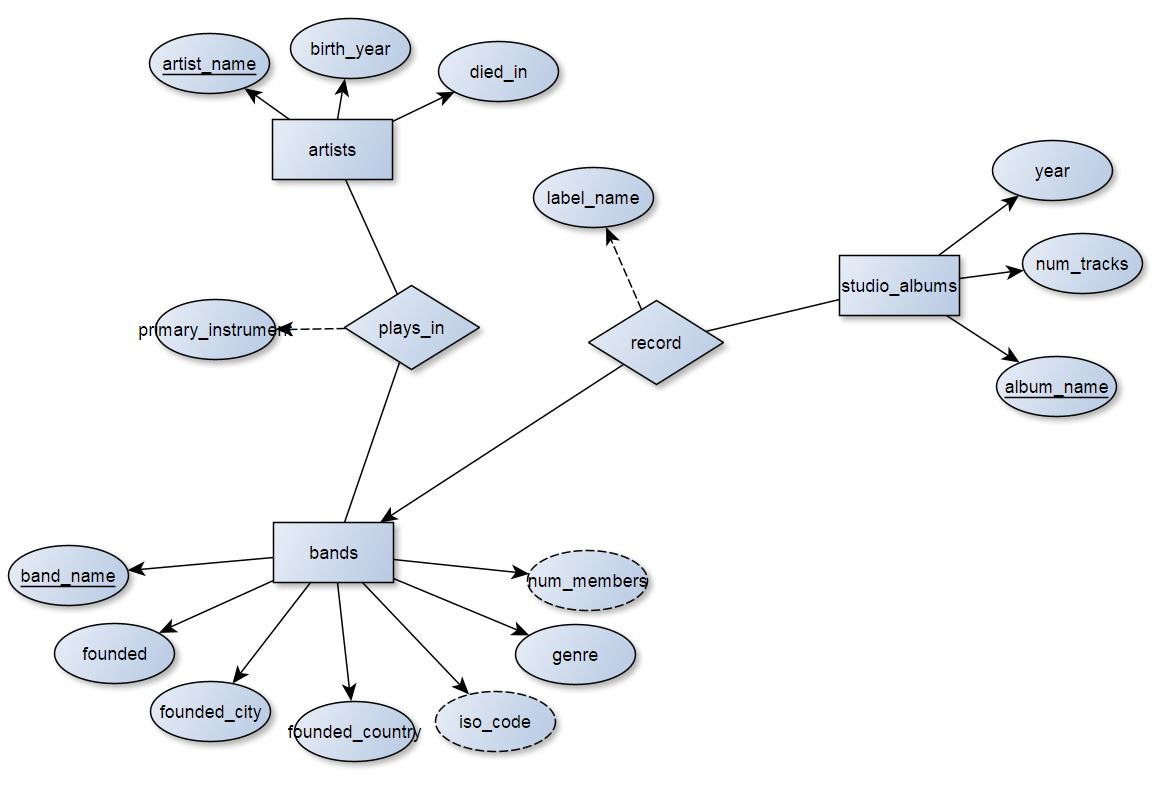

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
%load_ext google.colab.data_table

from pathlib import Path
import os

import sqlite3
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Path('/content/drive/MyDrive/CS5012_proj/Music.db').touch() # db name

connection = sqlite3.connect('/content/drive/MyDrive/CS5012_proj/Music.db')
c = connection.cursor()
#print(connection.total_changes)


c.execute('''CREATE TABLE artists
             (artist_name varchar(50) PRIMARY KEY, 
             birth_year integer CHECK(birth_year < 2050 AND birth_year > 1900), 
             died_in integer CHECK((died_in <= 2050 AND died_in > 1900) OR 
             died_in = 9999))''')

c.execute('''CREATE TABLE bands
             (band_name varchar(50) PRIMARY KEY, 
             founded integer CHECK(founded < 2050 AND founded > 1900), 
             founded_city varchar(50),
             founded_country varchar(50),
             iso_code varchar(50),
             genre varchar(50),
             num_members integer)''')

c.execute('''CREATE TABLE plays_in
             (band_num integer, 
             artist_name varchar(50), 
             band_name varchar(50),
             primary_instrument varchar(20),
             primary key (artist_name, band_name),
             foreign key (artist_name) references artists,
             foreign key (band_name) references bands)''')

c.execute('''CREATE TABLE studio_albums
             (band_name varchar(50),
             album_name varchar(100),
             year integer CHECK(year < 2050 AND year > 1900),
             num_tracks integer CHECK(num_tracks > 0),
             primary key (album_name),
             foreign key (band_name) references bands)''')

c.execute('''CREATE TABLE record
             (band_name varchar(50),
             album_name varchar(100),
             label_name varchar(50),
             primary key (band_name, album_name),
             foreign key (band_name) references bands,
             foreign key (album_name) references studio_albums)''')

connection.commit()

print('Finished')
          

Finished


In [4]:
artists_df = pd.read_csv('/content/drive/MyDrive/CS5012_proj/artists.csv', encoding='cp1252')
artists_df.to_sql('artists',connection,if_exists='replace',index=False)

plays_in_df = pd.read_csv('/content/drive/MyDrive/CS5012_proj/plays_in.csv', encoding='cp1252')
plays_in_df.to_sql('plays_in',connection,if_exists='replace',index=False)

bands_df = pd.read_csv('/content/drive/MyDrive/CS5012_proj/bands.csv', encoding='cp1252')
bands_df.to_sql('bands',connection,if_exists='replace',index=False)

studio_albums_df = pd.read_csv('/content/drive/MyDrive/CS5012_proj/studio_albums.csv', encoding='UTF-8')
studio_albums_df.to_sql('studio_albums',connection,if_exists='replace',index=False)

record_df = pd.read_csv('/content/drive/MyDrive/CS5012_proj/record.csv', encoding='UTF-8')
record_df.to_sql('record',connection,if_exists='replace',index=False)

connection.commit()


Update Solo to artist's name where applicable:

In [5]:
update_solo = '''
UPDATE plays_in
SET band_name = artist_name
WHERE band_name = 'Solo'
'''

connection.execute(update_solo)

connection.commit()

Add more appropriate information than `NULL` in birth and death years for artists; run a simple SQL select all from the table to check results of the commit.

In [6]:
update_born = '''
UPDATE artists
SET birth_year= 'Unknown'
WHERE birth_year is NULL;
'''

connection.execute(update_born)

connection.commit()

update_died = '''
UPDATE artists
SET died_in= 'Alive'
WHERE died_in is NULL;
'''

connection.execute(update_died)

connection.commit()


In [7]:
check_artists = '''
select * from artists'''
pd.read_sql(check_artists, connection)

,artist_name,birth_year,died_in
0,Olafur Arnalds,1986,Alive
1,Otis Redding,1941,1967
2,Joanna Newsom,1982,Alive
3,John Lennon,1940,1980
4,Paul McCartney,1942,Alive
...,...,...,...
63,Olena Tsybulska,Unknown,Alive
64,Iryna Kovalenko,Unknown,Alive
65,Nina Garenetska,Unknown,Alive
66,Rodrigo SÃ¡nchez,1974,Alive


Query 1) We start with a really simple query to ensure that the `plays_in` table loaded properly, especially with any bands labeled with Solo as the artist's name. This is one of our most important tables as it links artists to their respective bands. Without it working properly, the rest of our questions and queries would be meaningless as well.

In [8]:
check_playsIn = '''SELECT *
FROM plays_in'''

pd.read_sql(check_playsIn, connection)

,band_num,artist_name,band_name,primary_instrument
0,1,Dave Grohl,Nirvana,Drums
1,2,Dave Grohl,Foo Fighters,Various
2,3,Dave Grohl,Queens of the Stoneage,Drums
3,4,Dave Grohl,Tenacious D,Drums
4,1,Olafur Arnalds,Olafur Arnalds,Piano
...,...,...,...,...
81,1,Olena Tsybulska,DakhaBrakha,Drums
82,1,Iryna Kovalenko,DakhaBrakha,Various
83,1,Nina Garenetska,DakhaBrakha,Cello
84,1,Rodrigo SÃ¡nchez,Rodrigo y Gabriela,Guitar


Query 2) We wanted to see if the popularity of drumming has changed over the years. To do this, we grouped the result of a join between `artists` and `plays_in`, then used a `HAVING`, we set `primary_instrument` to `Drums`. We need a `WHERE` before the group by since we want to select ALL the drummers out of all of the instruments. Since `Unknown` contains many instruments, using a `HAVING` drops the drums since they aren't first in the list. 

In [9]:
instrument_count = '''SELECT a.birth_year, count(p.primary_instrument) as Count_Drummers
FROM artists AS a left JOIN plays_in AS p ON a.artist_name = p.artist_name
where p.primary_instrument = 'Drums'
group by a.birth_year
'''

pd.read_sql(instrument_count, connection)

,birth_year,Count_Drummers
0,1940,1
1,1946,1
2,1954,1
3,1958,1
4,1969,3
5,Unknown,5


Query 3) Of course artists produce albums. We were interested in seeing if any particular genre in the database stood out, so we wanted to count the albums by genre. Somewhat unsurprisingly, Rock stood out by far, especially when combined with sub-genres of rock like Indie Rock or Post Rock. Rock is sort of a catch-all in music as it incorporates many other styles, so this makes sense. 

In [10]:
sql = '''SELECT Genre, count(DISTINCT album_name) as Album_Count
FROM  studio_albums NATURAL JOIN bands
GROUP BY Genre
ORDER BY Album_Count DESC'''

pd.read_sql(sql, connection)

,genre,Album_Count
0,Rock,49
1,Soul,21
2,Contemporary Classical,20
3,Indie Rock,16
4,Pop Rock,14
5,Post Rock,13
6,R&B,13
7,Math Rock,11
8,Progressive Rock,9
9,Folk,7


Visualization 1) Our first visualization is a graphical representation of the above query: total `Album_Count` by `genre`. The bar graph below demonstrates how predominantly the `Rock` genre (and its subgenres) feature in our database.

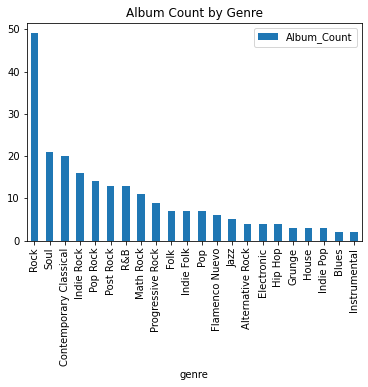

In [11]:
from matplotlib import pyplot as plt, cm
import seaborn as sns

sql = '''SELECT genre, count(DISTINCT album_name) as Album_Count
FROM  studio_albums NATURAL JOIN bands
GROUP BY genre
ORDER BY Album_Count DESC'''

df = pd.read_sql(sql, connection)

df.plot(kind="bar", x="genre", y="Album_Count", title="Album Count by Genre")
plt.show()

Query 4) We now want to see if we can match bands with the albums they made. We want to return the top 5.

We find that George Harrison, who was prolific as a solo artist, is unsurprisingly at the top of the list. 


In [12]:
top_5 = '''SELECT band_name, count(DISTINCT album_name) as Album_Count
FROM  studio_albums NATURAL JOIN bands
GROUP BY band_name
ORDER BY Album_Count DESC
limit 5'''


pd.read_sql(top_5, connection)


,band_name,Album_Count
0,George Harrison,12
1,U2,12
2,Marvin Gaye,11
3,Coheed and Cambria,9
4,Ludovico Einaudi,8


Query 5) We also thought it would be interesting to see all of the eponymous albums, i.e. where the album name contains the band's name.

In [13]:
band_in_album = '''SELECT DISTINCT band_name, album_name
FROM  studio_albums s NATURAL JOIN bands b
where UPPER(s.album_name) like '%' || UPPER(b.band_name) || '%' '''

pd.read_sql(band_in_album, connection)

,band_name,album_name
0,Foo Fighters,Foo Fighters
1,The National,The National
2,Balmorhea,Balmorhea
3,Bon Iver,Bon Iver
4,The Beatles,With The Beatles
5,Otis Redding,The Great Otis Redding Sings Soul Ballads
6,Otis Redding,Otis Blue: Otis Redding Sings Soul
7,Otis Redding,Complete & Unbelievable: The Otis Redding Dict...
8,George Harrison,George Harrison
9,Marvin Gaye,The Soulful Moods of Marvin Gaye


Query 6) Another query of interest is to see how many bands each artist is in, how many albums they were a part of producing (for all of the bands in which they play/played), and the average number of tracks per album.

We once again see George Harrison at the top of the list -- as seen, his 12 solo albums led the group for bands, and his 8 with The Beatles was more than enough to keep him on top.

In [14]:
plays_in = '''SELECT p.artist_name, count(DISTINCT p.band_name) as Num_Bands, 
count(distinct s.album_name) as Num_Albums, 
round(avg(num_tracks), 2) as Avg_Tracks
FROM  plays_in p 
LEFT OUTER JOIN studio_albums s
on
p.band_name = s.band_name

GROUP BY p.artist_name
ORDER BY Num_Albums desc
'''

pd.read_sql(plays_in, connection)

,artist_name,Num_Bands,Num_Albums,Avg_Tracks
0,George Harrison,2,20,13.70
1,Dave Grohl,4,17,13.65
2,Adam Clayton,1,12,11.50
3,Bono,1,12,11.50
4,"Larry Mullen, Jr.",1,12,11.50
...,...,...,...,...
73,Markus Acher,1,2,11.50
74,Micha Acher,1,2,11.50
75,Tinashe Fazakerley,1,2,11.00
76,Tom Misch,1,2,12.50


Query 7) We also wanted to see the length of an artist's career -- from first album to their last. 

In [15]:
alb_range = '''SELECT p.artist_name, max(s.year) as Max_Album_year, 
min(s.year) as Min_Album_Year, max(s.year) - min(s.year) as Date_Range
FROM  plays_in p 
LEFT OUTER JOIN studio_albums s
on
p.band_name = s.band_name

GROUP BY p.artist_name
'''

pd.read_sql(alb_range, connection)

,artist_name,Max_Album_year,Min_Album_Year,Date_Range
0,Adam Clayton,2009,1980,29
1,Adele,2015,2008,7
2,Agnetha Faltskog,1980,1973,7
3,Aisha Burns,2021,2007,14
4,Alejandro Rose-Garcia,2018,2011,7
...,...,...,...,...
73,Wally de Backer,2011,2003,8
74,Xavier RosÃ©,2016,2008,8
75,Yamane Satoshi,2015,2005,10
76,Yamazaki Hirokazu,2015,2005,10


Query 8) Perhaps morbidly, we wanted to find any albums released by an artist posthumously. 

In [16]:
posthumous = '''SELECT p.artist_name, s.album_name, s.year, a.died_in
FROM  (plays_in p
LEFT OUTER JOIN studio_albums s
on p.band_name = s.band_name) NATURAL JOIN artists a
where s.year >= a.died_in
'''

pd.read_sql(posthumous, connection)

,artist_name,album_name,year,died_in
0,Otis Redding,King & Queen,1967,1967.0
1,Otis Redding,The Dock of the Bay,1968,1967.0
2,George Harrison,Brainwashed,2002,2001.0
3,Amy Winehouse,Amy Winehouse at the BBC,2012,2011.0
4,Amy Winehouse,Lioness: Hidden Treasures,2011,2011.0
5,Amy Winehouse,Remixes,2021,2011.0


Query 9) While our database is limited in size and scope, due to the fact that we sourced and added our own data (as opposed to importing it from a pre-existing database or music information repository), we were curious about the national origin of all bands. Unsurprisingly, most of our entries were bands founded in the United States, with the United Kingdom in second, and Japan and Iceland tied for the third position. Here, we counted the number of distinct `band_names` with the same `founded_country` from `bands`, then grouped by a new, derived attribute, `iso_code`, which we then used to produce a visualization. `iso_code` combined the count of bands founded in England and Scotland into a total count of bands founded in the United Kingdom.

In [17]:
choro_origin = '''SELECT founded_country, iso_code, count(DISTINCT band_name) as country_count
FROM  bands 
GROUP BY iso_code
ORDER BY country_count DESC
'''
pd.read_sql(choro_origin, connection)


,founded_country,iso_code,country_count
0,United States,USA,21
1,England,GBR,11
2,Iceland,ISL,2
3,Japan,JPN,2
4,Australia,AUS,1
5,Belgium,BEL,1
6,Canada,CAN,1
7,Germany,DEU,1
8,France,FRA,1
9,Ireland,IRL,1


Visualization 2) We created a choropleth map of the the bands' countries of origin.

In [19]:
import plotly.express as px

df_choro = pd.read_sql(choro_origin, connection)
fig = px.choropleth(df_choro, locations="iso_code",
                    color="country_count",
                    hover_name="founded_country",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

Query 10) As an extension of the preceding query, we summed the total `num_members` from `bands` founded in the same country, in order to get a count of the total number of musicians/artists associated with each nation. Once again, we were not surprised to see that most of our musicians were associated with bands originating in the United States, with Great Britain in second place. However, due to the size of a few select bands, Jamaica found itself in third place, accounting for 19 musicians. Japan and Australia placed a distant fourth and fifth, respectively.

In [20]:
choro_num_mems = '''SELECT founded_country, iso_code, SUM(num_members) as musician_count
FROM  bands 
GROUP BY iso_code
ORDER BY musician_count DESC
'''
pd.read_sql(choro_num_mems, connection)

,founded_country,iso_code,musician_count
0,United States,USA,51
1,England,GBR,26
2,Jamaica,JAM,19
3,Japan,JPN,8
4,Australia,AUS,5
5,France,FRA,4
6,Ireland,IRL,4
7,Sweden,SWE,4
8,Ukraine,UKR,4
9,Germany,DEU,3


Visualization 3) We produced a choropleth map to represent the total count of musicians belonging to bands founded in various nations.

In [21]:


df_choro_mem = pd.read_sql(choro_num_mems, connection)
fig = px.scatter_geo(df_choro_mem, locations="iso_code",
                    color="musician_count", size="musician_count",
                    hover_name="founded_country",
                    color_continuous_scale=px.colors.sequential.algae)
fig.show()

Query 11) We queried the database to determine the number of years that each artist was or has been actively producing/releasing `studio_albums`.

In [22]:
years_active = '''SELECT p.artist_name, primary_instrument, max(s.year) - min(s.year) as Years_Active
FROM  plays_in p 
LEFT OUTER JOIN studio_albums s
on
p.band_name = s.band_name

GROUP BY p.artist_name
ORDER BY Years_Active DESC
'''
pd.read_sql(years_active, connection)


,artist_name,primary_instrument,Years_Active
0,George Harrison,Guitar,39
1,Ludovico Einaudi,Piano,32
2,Adam Clayton,Bass,29
3,Bono,Voice,29
4,Dave Grohl,Drums,29
...,...,...,...
73,Jamila Woods,Voice,2
74,Tom Misch,Various,2
75,Jimi Hendrix,Guitar,1
76,Mitch Mitchell,Drums,1


Visualization 4) We subsequently produced a visualization of the `Years_Active` query, updating the colors of the bars to represent `primary_instrument` in an attempt to determine if there is any relationship between an artist's `primary_instrument` and the number of years they've remained active. With this visualization, it also becomes clear which `artist_name` has been the most prolific and/or active longest for each `primary_instrument`.

In [23]:
df_years_active = pd.read_sql(years_active, connection)

fig = px.bar(df_years_active, x="artist_name", y="Years_Active",
                 color="primary_instrument", )
fig.show()

Query 12) We ran a query to ascertain the number of `studio_albums` released, by `genre`, from year to year.

In [24]:
genre_thru_the_years = '''SELECT genre, year, count(DISTINCT album_name) as Album_Count
FROM  studio_albums NATURAL JOIN bands
GROUP BY genre, year
'''
pd.read_sql(genre_thru_the_years, connection)

,genre,year,Album_Count
0,Alternative Rock,1994,1
1,Alternative Rock,1996,1
2,Alternative Rock,1998,1
3,Alternative Rock,2001,1
4,Blues,2018,1
...,...,...,...
177,Soul,1973,1
178,Soul,1982,1
179,Soul,2012,1
180,Soul,2015,1


Visualization 5) A categorical plot of the query reveals temporal trends in music, even with the limited scope of our database. For example, it is easy to see that genres like Hip Hop and House did not truly emerge on the scene until recent years; conversely, Grunge had a limited window of popularity (from the late 1980s to early 1990s).

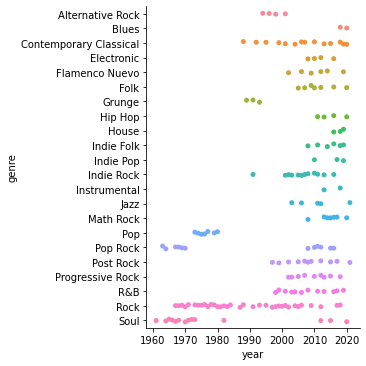

In [25]:
import seaborn as sns

df_genre_yr = pd.read_sql(genre_thru_the_years, connection)

sns.catplot(x="year",y="genre",data=df_genre_yr)

Query 13) We performed a query to count the number of artists with particular `primary_instruments`: Voice was the top result, followed by Guitar and Drums.

In [26]:
primary_instru = '''SELECT primary_instrument, count(p.artist_name) as artist_count
FROM  plays_in p
GROUP BY primary_instrument
ORDER BY artist_count DESC
'''
pd.read_sql(primary_instru, connection)

,primary_instrument,artist_count
0,Voice,24
1,Guitar,19
2,Drums,15
3,Various,11
4,Bass,8
5,Piano,4
6,Violin,2
7,Cello,1
8,Harp,1
9,Mbira,1


Visualization 6) A visualization of the above query provided percentages in additional to total `artist_count` for each `primary_instrument`.

In [27]:

df_primary_instru = pd.read_sql(primary_instru, connection)

fig = px.pie(df_primary_instru, values='artist_count', names='primary_instrument',
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

Query 14) How many tracks of each genre were produced by the bigger record labels from year to year?

In [28]:
tracks_3d = '''SELECT year, genre, label_name, SUM(num_tracks) as total_tracks
FROM  studio_albums NATURAL JOIN bands NATURAL JOIN record
WHERE label_name="Columbia"
GROUP BY genre
UNION
SELECT year, genre, label_name, SUM(num_tracks) as total_tracks
FROM  studio_albums NATURAL JOIN bands NATURAL JOIN record
WHERE label_name="Atlantic"
GROUP BY genre
UNION
SELECT year, genre, label_name, SUM(num_tracks) as total_tracks
FROM  studio_albums NATURAL JOIN bands NATURAL JOIN record
WHERE label_name="Island"
GROUP BY genre
UNION
SELECT year, genre, label_name, SUM(num_tracks) as total_tracks
FROM  studio_albums NATURAL JOIN bands NATURAL JOIN record
WHERE label_name="Sony Classics"
GROUP BY genre
'''

pd.read_sql(tracks_3d, connection)

,year,genre,label_name,total_tracks
0,1979,Rock,Columbia,48.0
1,1980,Rock,Atlantic,46.0
2,1982,Soul,Columbia,8.0
3,1997,Rock,Island,104.0
4,2004,R&B,Columbia,113.0
5,2010,Progressive Rock,Columbia,40.0
6,2011,Jazz,Island,50.0
7,2013,Contemporary Classical,Sony Classics,61.0
8,2015,Pop Rock,Columbia,34.0
9,2016,Indie Rock,Atlantic,60.0


Visualization 7) A visualization of the preceding query. While the 3D scatter plot is somewhat sparse as-is, it is easy to see how, with more data in the database, it could prove an illuminating display.

In [29]:
df_tracks_3d = pd.read_sql(tracks_3d, connection)

fig = px.scatter_3d(df_tracks_3d, x='year', y='genre', z='total_tracks',
              color='total_tracks',
              symbol='label_name', opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

Query 15) How many tracks of each genre were produced by each label from year to year?

In [30]:
tracks_3d_2 = '''SELECT year, genre, label_name, SUM(num_tracks) as total_tracks
FROM  studio_albums NATURAL JOIN bands NATURAL JOIN record
GROUP BY genre, year
'''

pd.read_sql(tracks_3d_2, connection)

,year,genre,label_name,total_tracks
0,1994,Alternative Rock,RCA,12.0
1,1996,Alternative Rock,RCA,12.0
2,1998,Alternative Rock,RCA,11.0
3,2001,Alternative Rock,RCA,12.0
4,2018,Blues,Blue Note,13.0
...,...,...,...,...
172,1973,Soul,Tamia,8.0
173,1982,Soul,Columbia,8.0
174,2012,Soul,Warner Bros.,12.0
175,2015,Soul,Warner Bros.,10.0


Visualization 8) A visualization of the query above.

In [31]:
df_tracks_3d_2 = pd.read_sql(tracks_3d_2, connection)

fig = px.bar(df_tracks_3d_2, y="label_name", x="total_tracks", color="genre", orientation="h",
             color_continuous_scale='Bluered_r', hover_name="year")

fig.show()